# KMeans clusturing
There are several methods to do it we will follow the iterative method
>1. Start with a set of k-means, which are points in d-dimensional space
2. Assign each point to the mean to which it is closest.
3. If no point’s assignment has changed, stop and keep the clusters.
4. If some point’s assignment has changed, recompute the means and return to step 2.

In [19]:
#imports
from __future__ import division
from functools import reduce,partial

import math,random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


In [11]:
def vector_add(v,w):
    return [v_i+w_i for v_i,w_i in zip(v,w)]

def vector_subtraction(v,w):
    return [v_i - w_i for v_i,w_i in zip(v,w)]
vector_sum = partial(reduce,vector_add)
def scalar_multiply(c,v):
    return [c*v_i for v_i in v]
def vector_mean(vectors):
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))
def squared_distance(v,w):
    return sum([(v_i - w_i)**2
               for v_i,w_i in zip(v,w)])
def distance(v,w):
    return math.sqrt(squared_distance(v,w))

In [12]:
class KMeans:
    def __init__(self,k):
        self.k = k
        self.means = None
    def classify(self,input):
        return min(range(self.k),key=lambda i: squared_distance(input,self.means[i]))
    def train(self,inputs):
        self.means = random.sample(inputs,self.k)
        assignments = None
        while True:
            new_assignments = list(map(self.classify,inputs))
            if assignments == new_assignments:
                return
            assignments = new_assignments
            
            for i in range(self.k):
                i_points = [p for p,a in zip(inputs,assignments) if a == i]
                if i_points:
                    self.means[i] = vector_mean(i_points)

3-means:
[[-25.857142857142854, -4.714285714285714], [20.0, 26.0], [16.666666666666664, 13.666666666666666]]



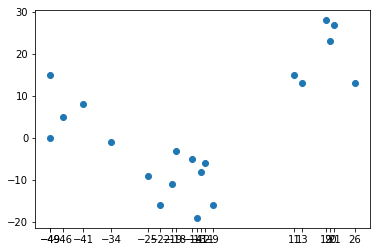

In [56]:
inputs = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]
inputs_x = [x[0] for x in inputs]
inputs_y = [x[1] for x in inputs]
plt.scatter(inputs_x,inputs_y)
random.seed(0) 
clusterer = KMeans(3)
clusterer.train(inputs)
print("3-means:")
print(clusterer.means)
print()

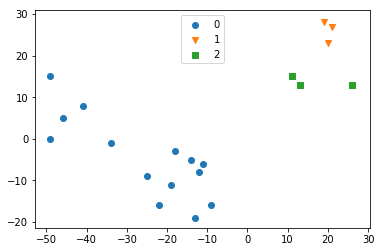

In [82]:
assignment = list(map(clusterer.classify,inputs))
outputs = []
# outputs_0 = [x for x,a in zip(inputs,assignment) if a==0]
def print_a_list(inputs,marker,label):
    inputs_x = [x[0] for x in inputs]
    inputs_y = [x[1] for x in inputs]
    plt.scatter(inputs_x,inputs_y,marker=marker,label=label)
for k in range(clusterer.k):
    outputs.append((k,[x for x,a in zip(inputs,assignment) if a==k]))
# print(outputs)
markers = ["o","v","s"]
k_mark = 0
for output in outputs:
    print_a_list(output[1],markers[k_mark],output[0])
    k_mark += 1
plt.legend(loc='upper center')
plt.show()

In [14]:
def squared_clustering_errors(inputs,k):
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignment = list(map(clusterer.classify,inputs))
    
    return sum(squared_distance(input,means[cluster])
              for input,cluster in zip(inputs,assignment))

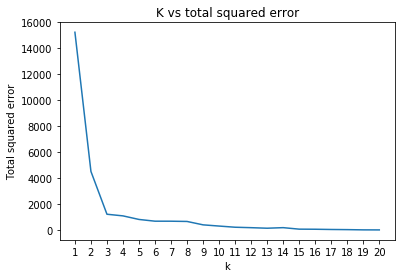

In [26]:
ks = range(1,len(inputs)+1)
errors = [squared_clustering_errors(inputs,i)
         for i in ks]
plt.plot(ks,errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("Total squared error")
plt.title("K vs total squared error")
plt.show()

# Colour clustering using KMeans

In [39]:
path_to_png_file = r".\images\kmeans.png" # wherever your image is
img = mpimg.imread(path_to_png_file)

In [40]:
pixels = [pixel for row in img
         for pixel in row]


In [41]:
clusterer = KMeans(5)
clusterer.train(pixels)

[[0.15993705263473104, 0.3000287788640519, 0.1093969315681723, 1.0], [0.914748236677116, 0.7741049561968204, 0.8098945504926108, 1.0], [0.8810171569464168, 0.7549537023603069, 0.029050060669772095, 1.0], [0.757603478880246, 0.26558743084448866, 0.22180033277556682, 1.0], [0.08185632375967823, 0.3672890144308614, 0.7243879464679993, 1.0]]


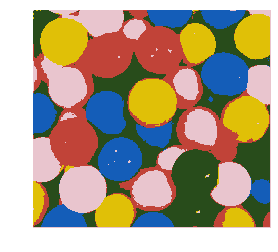

In [43]:
print(clusterer.means)
def recolor(pixel):
    cluster = clusterer.classify(pixel)
    return clusterer.means[cluster]
new_img = [[recolor(pixel) for pixel in row]
          for row in img]
plt.imshow(new_img)
plt.axis('off')
plt.show()